# Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy #for language models

from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#reading dataset
tweet = pd.read_csv("Elon_musk.csv",encoding='ISO-8859-1')
tweet

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#renaming text column as tweet
#tweet.rename({'Text':'tweets'},axis=1,inplace = True)

In [4]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
#dropping 1 column Unnamed:0
tweet.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
tweet.tail()

,Text
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,Progress update August 28


In [7]:
tweet.isna()

,Text
0,False
1,False
2,False
3,False
4,False
...,...
1994,False
1995,False
1996,False
1997,False


In [8]:
tweet.isna().sum()

Text    0
dtype: int64

In [9]:
#Load stop words
stop = pd.read_csv('stop.txt', encoding = "ISO-8859-1")
stop.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [10]:
#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string #for doing operation on strings

In [11]:
raw_tweets = tweet.copy()

In [12]:
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

In [13]:
raw_tweets['Text'] = tweet['Text'].apply(clean_text)
raw_tweets

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [14]:
def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

raw_tweets['Text'] = raw_tweets['Text'].apply(thorough_clean)
raw_tweets
     

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [15]:
#Word frequency of raw_tweets
freq_uncleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rupak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

In [18]:
#removing stopwords

raw_tweets['Text'] = raw_tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
     

In [19]:
raw_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [20]:
#word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

the     487
to      400
is      356
u       319
of      315
in      221
amp     219
for     194
it      194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [21]:
 #Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(raw_tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
     

C:\Users\rupak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
3526  the          487   0.029033
3578   to          400   0.023846
1931   is          356   0.021223
2454   of          315   0.018779
1827   in          221   0.013175


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

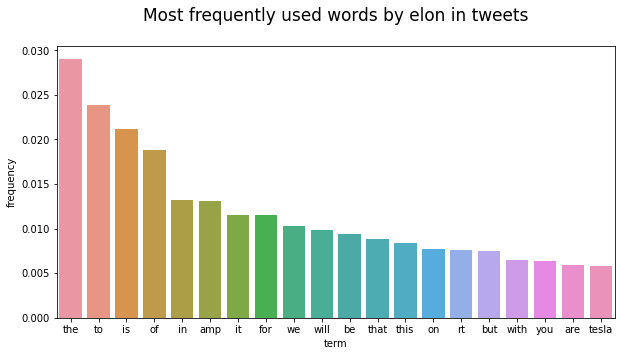

In [23]:

fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])

plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)
     

In [24]:
string_Total = " ".join(raw_tweets["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

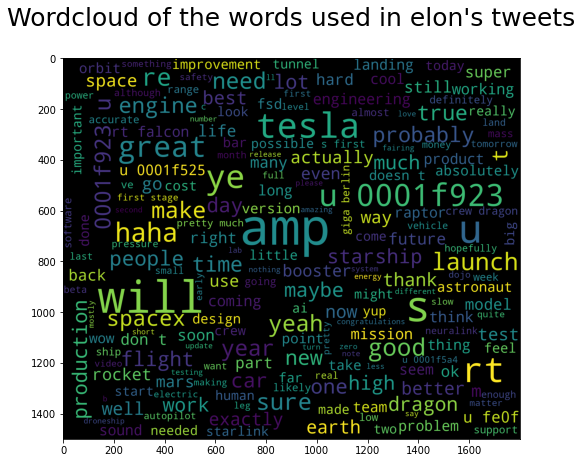

In [25]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)
     

In [26]:

final_tweets = raw_tweets

In [27]:
#create function to get subjective and polarity of tweets
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets
     

,Text,subjectivity,polarity
0,i m an alien,0.750000,-0.250000
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execut...,0.366667,0.275000
...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000


In [28]:

#create a function for negative, neutral, positive analysis
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets     


,Text,subjectivity,polarity,Analysis
0,i m an alien,0.750000,-0.250000,Negative
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge is underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china for amazing execut...,0.366667,0.275000,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111,Positive
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000,Negative


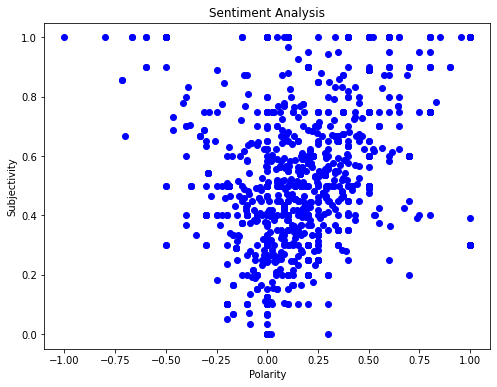

In [29]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
  plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

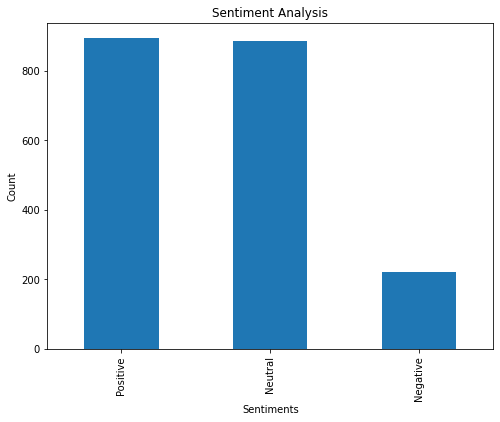

In [30]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()
     